In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import platform
import pandas as pd
import numpy as np
import pickle
import math
from joblib import dump,load

In [2]:
if platform.uname()[1]=='CD-CQQQRH2':
    working_directory = 'C:\\Users\\oreler\\Documents\\git_repositories\\predicting_hiv_status'
elif platform.uname()[1]=='CL-5BTHZY2':
    working_directory = 'C:\\Users\\oreler\\Documents\\gitlab_repositories\\predicting_hiv_status'
else:
    working_directory = '/home/oreler/predicting_hiv_status'

os.chdir(working_directory)

In [3]:
name = 'Zambia'

In [ ]:
gam = load('scripts/gam/IR_gam_scores_' + name + ".joblib")
elasticnet = load('scripts/elasticnet/IR_elasticnet_brier_' + name + ".joblib")
svc = load('scripts/svc/IR_svc_brier_' + name + ".joblib")
xgb = load('scripts/xgb/IR_xgb_brier_' + name + ".joblib")

In [5]:
gam_mean = []
gam_mean_f1 = []
gam_mean_brier = []

for i in range(50):
    
    gam_mean.append([(a+b+c+d+e)/5 for a,b,c,d,e in zip(gam[1][i],
                                                          gam[2][i],
                                                              gam[3][i],
                                                              gam[4][i],
                                                              gam[5][i])])

for i in range(50):
    
    gam_mean_brier.append(gam_mean[i][1])
    gam_mean_f1.append(gam_mean[i][2])

Text(0.5, 0.98, 'Generalized Additive Model (GAM)')

Text(0.5, 1.0, 'Hyperparameters tuning')

Text(0, 0.5, 'F1 score')

Text(0, 0.5, 'Brier score')

Text(0.5, 0, 'Set of hyperparameters')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
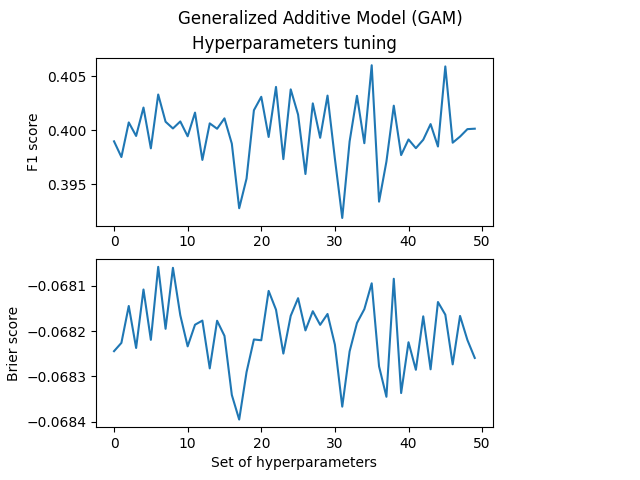

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1)
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([0.15, box1.y0, box1.width * 0.8, box1.height])
ax2.set_position([0.15, box2.y0, box2.width * 0.8, box2.height])
ax1.plot(gam_mean_f1)
ax2.plot(np.multiply(gam_mean_brier, -1))
fig.suptitle("Generalized Additive Model (GAM)")
ax1.set_title("Hyperparameters tuning")
ax1.set_ylabel("F1 score")
ax2.set_ylabel("Brier score")
ax2.set_xlabel("Set of hyperparameters")
#correl = np.corrcoef(gam_mean_f1, np.multiply(gam_mean_brier, -1))
#ax2.text(20, -0.0684, "Correlation: {:.1%}".format(correl[1][0]))

Text(0.5, 0.98, 'ElasticNet')

Text(0.5, 1.0, 'Hyperparameters tuning')

Text(0, 0.5, 'F1 score')

Text(0, 0.5, 'Brier score')

Text(0.5, 0, 'Set of hyperparameters')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
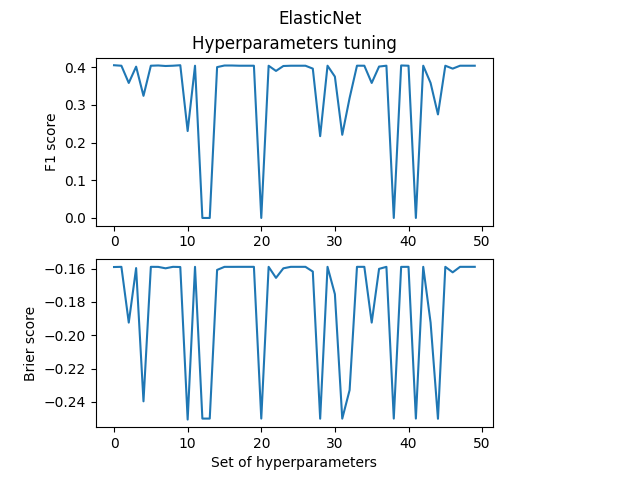

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1)
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([0.15, box1.y0, box1.width * 0.8, box1.height])
ax2.set_position([0.15, box2.y0, box2.width * 0.8, box2.height])
ax1.plot(elasticnet.cv_results_['mean_test_f1'])
ax2.plot(elasticnet.cv_results_['mean_test_brier_score_loss'])
fig.suptitle("ElasticNet")
ax1.set_title("Hyperparameters tuning")
ax1.set_ylabel("F1 score")
ax2.set_ylabel("Brier score")
ax2.set_xlabel("Set of hyperparameters")
#correl = np.corrcoef(elasticnet.cv_results_['mean_test_f1'], elasticnet.cv_results_['mean_test_brier_score_loss'])
#ax1.text(20, 0.1, "Correlation: {:.1%}".format(correl[1][0]))

Text(0.5, 0.98, 'Support Vector Classifier (SVC)')

Text(0.5, 1.0, 'Hyperparameters tuning')

Text(0, 0.5, 'F1 score')

Text(0, 0.5, 'Brier score')

Text(0.5, 0, 'Set of hyperparameters')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
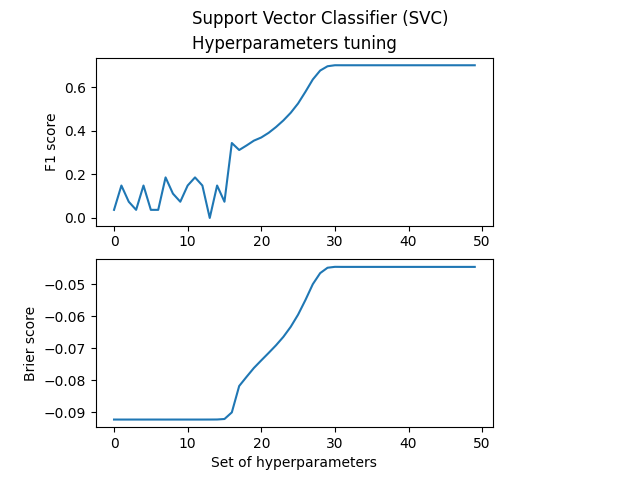

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1)
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([0.15, box1.y0, box1.width * 0.8, box1.height])
ax2.set_position([0.15, box2.y0, box2.width * 0.8, box2.height])
ax1.plot(svc.cv_results_['mean_test_f1'])
ax2.plot(svc.cv_results_['mean_test_brier_score_loss'])
fig.suptitle("Support Vector Classifier (SVC)")
ax1.set_title("Hyperparameters tuning")
ax1.set_ylabel("F1 score")
ax2.set_ylabel("Brier score")
ax2.set_xlabel("Set of hyperparameters")
#correl = np.corrcoef(svc.cv_results_['mean_test_f1'], svc.cv_results_['mean_test_brier_score_loss'])
#ax2.text(30, -0.07906, "Correlation: {:.1%}".format(correl[1][0]))

Text(0.5, 0.98, 'XGBoost')

Text(0.5, 1.0, 'Hyperparameters tuning')

Text(0, 0.5, 'F1 score')

Text(0, 0.5, 'Brier score')

Text(0.5, 0, 'Set of hyperparameters')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
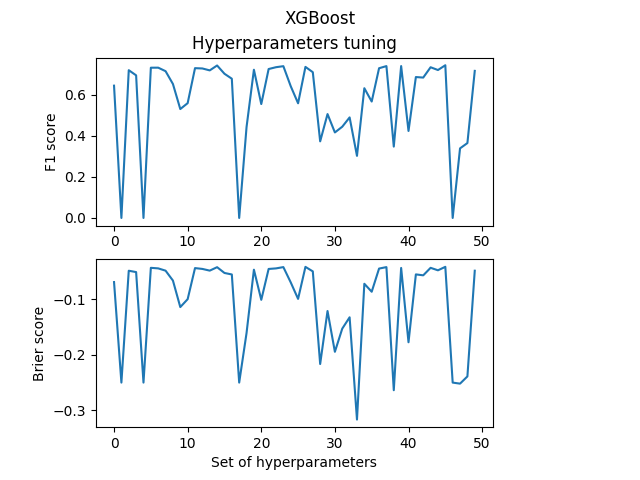

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1)
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([0.15, box1.y0, box1.width * 0.8, box1.height])
ax2.set_position([0.15, box2.y0, box2.width * 0.8, box2.height])
ax1.plot(xgb.cv_results_['mean_test_f1'])
ax2.plot(xgb.cv_results_['mean_test_brier_score_loss'])
fig.suptitle("XGBoost")
ax1.set_title("Hyperparameters tuning")
ax1.set_ylabel("F1 score")
ax2.set_ylabel("Brier score")
ax2.set_xlabel("Set of hyperparameters")
#correl = np.corrcoef(xgb.cv_results_['mean_test_f1'], xgb.cv_results_['mean_test_brier_score_loss'])
#ax1.text(20, 0.2, "Correlation: {:.1%}".format(correl[1][0]))